## Import Modules

First, let's import necessary modules for the project.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load the Data

Next, we'll load the life expectancy and GDP data from **all_data.csv** into a DataFrame called `df` and ch.

In [76]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We'll also check the shape of `df`.

In [77]:
df.shape

(96, 4)

`df` has 96 rows and 4 columns.

## Explore the Data

What countries are in `df`?

In [78]:
countries = df['Country'].unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are 6 countries represented in the data:  Chile, China, Germany, Mexico, the USA, and Zimbabwe.

What is the time range for the data?

In [79]:
years = df['Year'].unique()
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data ranges from 2000 to 2015.

#### Clean the Column Names

Let's clean up the column names so they are labeled consistently and easy to work with.  The `.columns` method is useful for renaming all of your columns; instead, the `.rename` method should be used to rename a few columns in your DataFrame.

In [80]:
df.columns = ['country', 'year', 'life_expectancy', 'gdp']
df.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Sometimes, data is better explored through plots.  We'll take a look at a few below.

C:\Users\mattb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


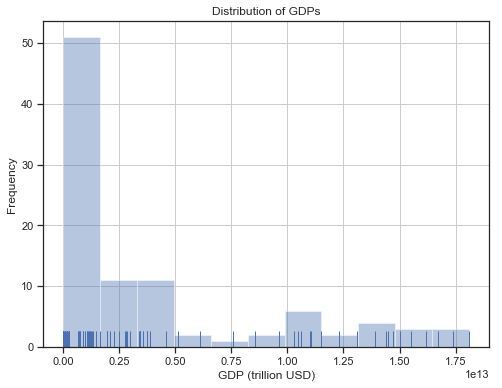

In [81]:
plt.figure(figsize=(8,6))

ax = sns.distplot(df.gdp, rug = True, kde=False)

plt.title('Distribution of GDPs')
plt.xlabel('GDP (trillion USD)')
plt.ylabel('Frequency')

plt.show()

The distribution of GDP is very right skewed as most of the data is on the left side.  This could be described as a power law distribution, where a proportional change in GDP results in a proportional change in frequency.  This would make sense as the distribution of income in a market economy follows the power law.  In macroeconomic theory, GDP (a measure of national economic output) is equal to a nation's income.

C:\Users\mattb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


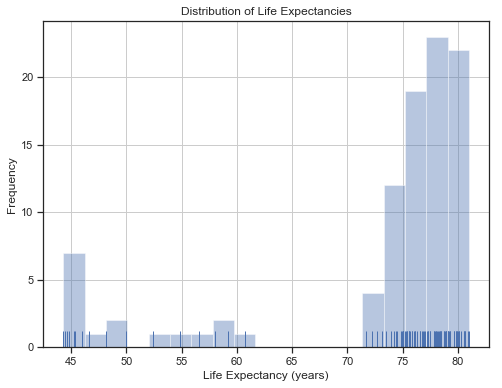

In [82]:
plt.figure(figsize=(8,6))

sns.distplot(df.life_expectancy, rug = True, kde=False)

plt.title('Distribution of Life Expectancies')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')

plt.show()

In contrast to GDP, the distribution for life expectancy is very left skewed.  Upon closer examination, the data could also be considered multimodal.

Next, let's break up the data by country and find the average GDP and life expectancy for each.

In [83]:
df_means = df[['country', 'gdp', 'life_expectancy']].groupby('country').mean().reset_index()
df_means

,country,gdp,life_expectancy
0,Chile,1.697888e+11,78.94375
1,China,4.957714e+12,74.26250
2,Germany,3.094776e+12,79.65625
3,Mexico,9.766506e+11,75.71875
4,United States of America,1.407500e+13,78.06250
5,Zimbabwe,9.062580e+09,50.09375


Now, we can make bar plots for the means of each variable.

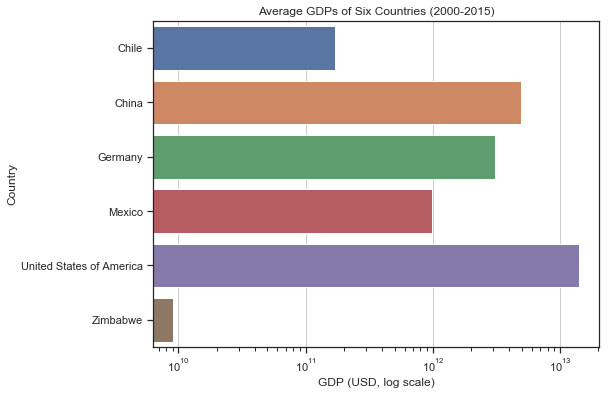

In [84]:
f, ax = plt.subplots(figsize = (8, 6))

sns.set_palette('Accent')
sns.set(style='ticks', rc={"axes.grid":True})

ax = sns.barplot(data = df_means, x = 'gdp', y = 'country')

plt.title('Average GDPs of Six Countries (2000-2015)')
plt.ylabel('Country')
plt.xlabel('GDP (USD, log scale)')

ax.set_xscale('log')

plt.show()

We should use a log scale for GDP for two reasons:
1. The difference in GDPs between the USA and Zimbabwe is on the order of 10<sup>3</sup>, making it difficult to compare on a linear scale.
2. When looking at a plot of GDP over time (as we will do later), the rate of economic growth is easy to interpret as the slope.

For these reasons, we will use a log scale for the GDP axis for all plots.

From this plot, we can see the USA has the largest GDP, with China, Germany, and Mexico about 5-10 times smaller than the USA.  Chile has a GDP about 100 times smaller than the USA, and Zimbabwe's GDP is about 1,000 times smaller.

Had we used a linear scale, Zimbabwe's GDP would not be visible, and Chile would be barely visible.

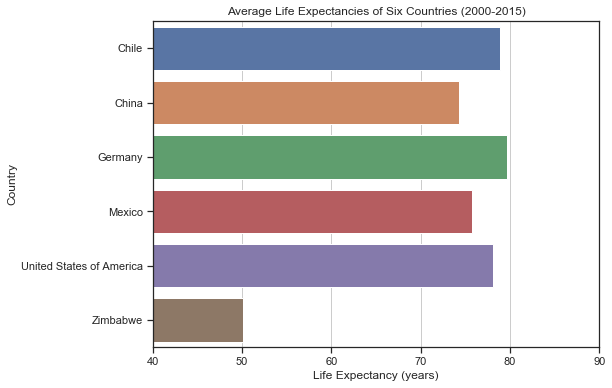

In [85]:
f, ax = plt.subplots(figsize = (8, 6))

sns.set_palette('Accent')
sns.set(style='ticks', rc={"axes.grid":True})

ax = sns.barplot(data = df_means, x = 'life_expectancy', y = 'country')

plt.xlim(40, 90)

plt.title('Average Life Expectancies of Six Countries (2000-2015)')
plt.ylabel('Country')
plt.xlabel('Life Expectancy (years)')

plt.show()

Every country in our dataset has a life expectancy in the mid-to-upper 70s, except for Zimbabwe, which has a life expectancy around 50.  This accounts for the left skew in the distribution.

#### Violin Plots

We can also take the GDP and life expectancy data and show the distributions by country in one plot.  The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot.

C:\Users\mattb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


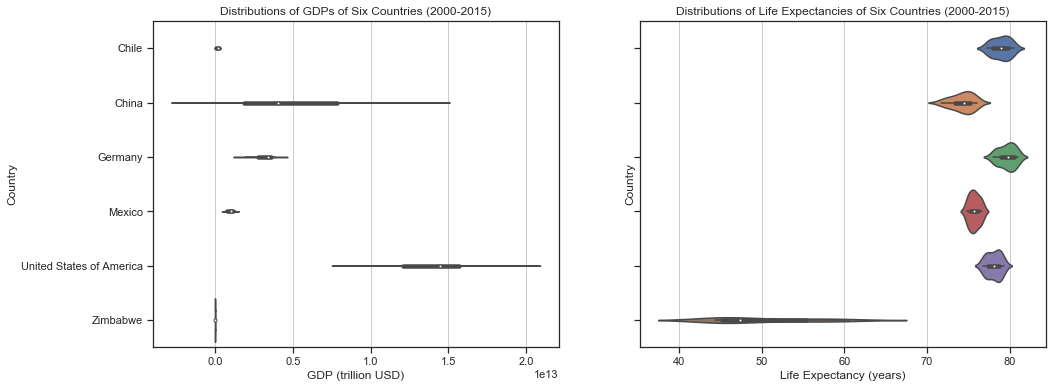

In [86]:
f, axes = plt.subplots(1, 2, sharey=True, figsize = (16, 6))

sns.set(style='ticks', rc={"axes.grid":True})

axes[0] = sns.violinplot(ax=axes[0], x=df['gdp'], y=df['country'])
axes[0].set_title('Distributions of GDPs of Six Countries (2000-2015)')
axes[0].set_ylabel('Country')
axes[0].set_xlabel('GDP (trillion USD)')

axes[1] = sns.violinplot(ax=axes[1], x=df['life_expectancy'], y=df['country'])
axes[1].set_title('Distributions of Life Expectancies of Six Countries (2000-2015)')
axes[1].set_xlabel('Life Expectancy (years)')
axes[1].set_ylabel('Country')

plt.show()

Country is on the x-axis and the distribution of numeric columns : GDP and life expectancy are on the y-axis. 

In the GDP plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.  This will be the only plot for GDP we won't use a log scale since the distributions are difficult to interpret.

In the life expectancy plot, many of the countries have shorter ranges, except for Zimbabwe which has a range spanning from the upper 30s to the upper 60s.

#### Swarm Plots

A newer method for showing distributions is the swarm plot, which can be used to complement box and violin plots.  First, the stand-alone swarm plot is shown; then it is overlayed on top of a violin plot.  Swarm plots are useful because they show dot density around the values as well as distribution through area/shape.

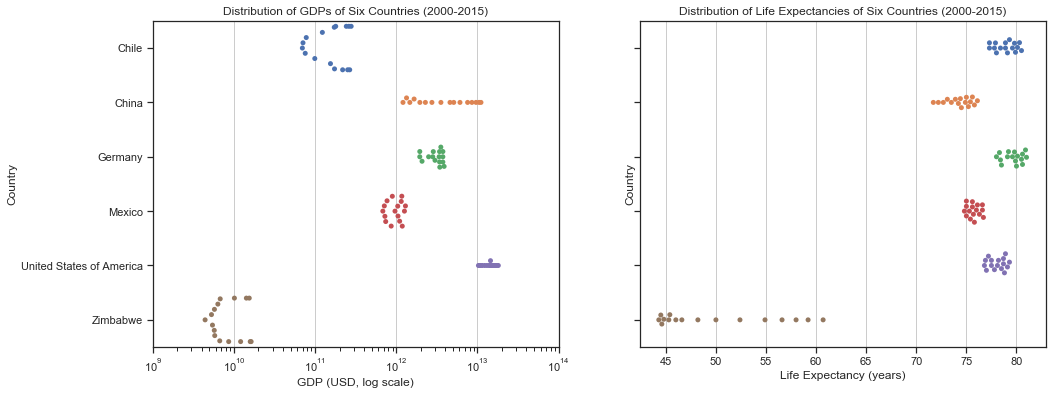

In [87]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

axes[0] = sns.swarmplot(ax=axes[0], x=df.gdp, y=df.country)
axes[0].set_xscale('log')
axes[0].set_xlim(10**9, 10**14)
axes[0].set_title('Distribution of GDPs of Six Countries (2000-2015)')
axes[0].set_ylabel('Country')
axes[0].set_xlabel('GDP (USD, log scale)')

axes[1] = sns.swarmplot(ax=axes[1], x=df.life_expectancy, y=df.country)
axes[1].set_title('Distribution of Life Expectancies of Six Countries (2000-2015)')
axes[1].set_xlabel('Life Expectancy (years)')
axes[1].set_ylabel('Country');

We can return to the log scale for GDP in this plot since the data points are not tied to a distribution, making it easier to interpret alone.  In the case of GDP, Chile, Germany, Mexico, and Zimbabwe have a cluster of dots that illustrate that several data points fall closely together. Alternatively, China and the USA have horizontal lines of data points, demonstrating the GDP growth of those countries.

Similar conclusions can be drawn from the life expectancy plot.  All countries but Zimbabwe have a cluster of data points, showing relatively constant life expectancy, while Zimbabwe has a horizontal line of points, demonstrating its increase in life expectancy.

C:\Users\mattb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


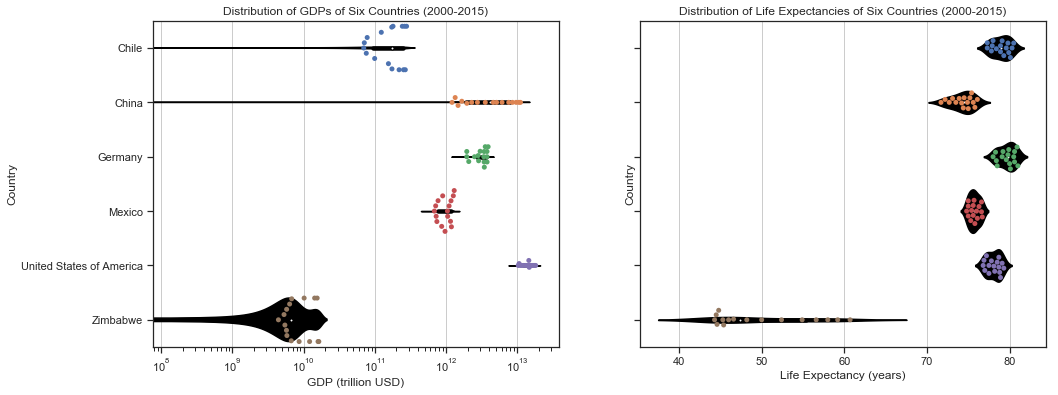

In [88]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

axes[0] = sns.violinplot(ax=axes[0], x=df.gdp, y=df.country, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x=df.gdp, y=df.country)
axes[0].set_xscale('log')
axes[0].set_title('Distribution of GDPs of Six Countries (2000-2015)')
axes[0].set_ylabel('Country')
axes[0].set_xlabel('GDP (trillion USD)')

axes[1] = sns.violinplot(ax=axes[1], x=df.life_expectancy, y=df.country, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x=df.life_expectancy, y=df.country)
axes[1].set_title('Distribution of Life Expectancies of Six Countries (2000-2015)')
axes[1].set_xlabel('Life Expectancy (years)')
axes[1].set_ylabel('Country');

Now, we can overlay the swarm plot on the violin plot and see why the violin plots have the distributions they have.

#### Facet Grids
##### Scatter Plot by Year

We can use Seaborn's `.FacetGrid` method to plot scatter plots of GDP vs. life expectancy over time.

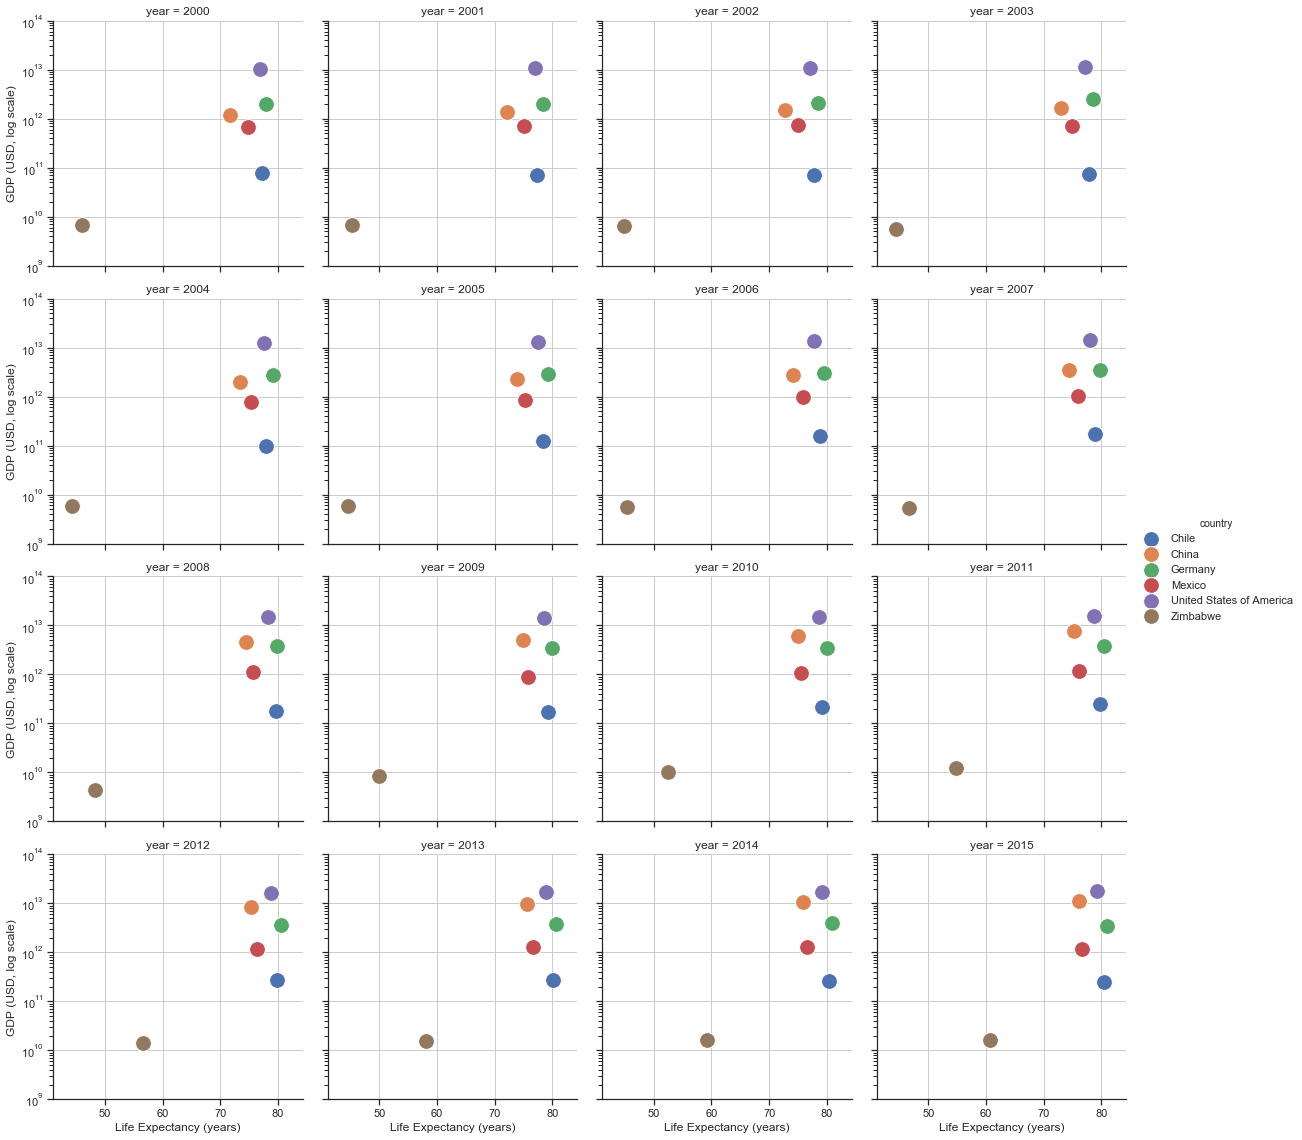

In [89]:
g = sns.FacetGrid(df, col = 'year', hue = 'country', col_wrap = 4, height = 4)
g = (g.map(plt.scatter, 'life_expectancy', 'gdp', edgecolor = "w", s = 250).add_legend().set_axis_labels('Life Expectancy (years)', 'GDP (USD, log scale)').set(yscale='log').set(ylim=(10**9, 10**14)))

From this FacetGrid of scatter plots, we can see large increases in both life expectancy and GDP over time for Zimbabwe.  China and Mexico also have noticeable increases in GDP.

##### Line Plot by Country

We can also use the FacetGrid to plot GDP and life expectancy individually over time.

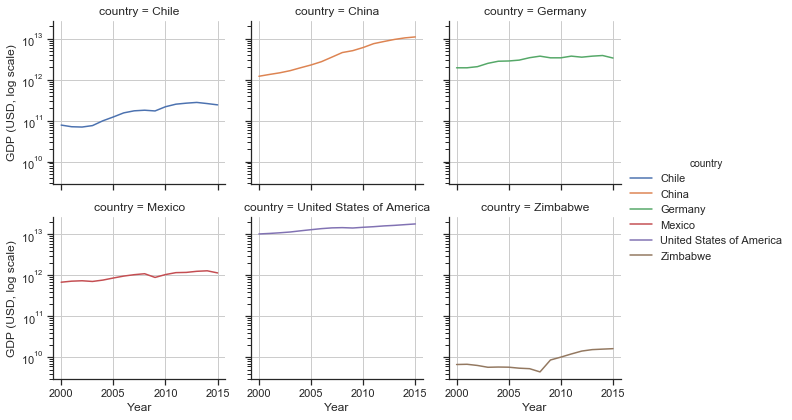

In [90]:
g2 = sns.FacetGrid(df, col = "country", col_wrap = 3, hue = 'country', sharey = True)
g2 = (g2.map(plt.plot, "year", "gdp").add_legend().set_axis_labels('Year', 'GDP (USD, log scale)').set(yscale='log'))

Now, by using a FacetGrid with the same y-axis scale, we can compare the GDP growth rates between countries.  This is easier to interpret than a single plot since we have no intersecting lines.  Looking at the plots, China has the highest growth rate, while most other countries have pretty small growth rates.

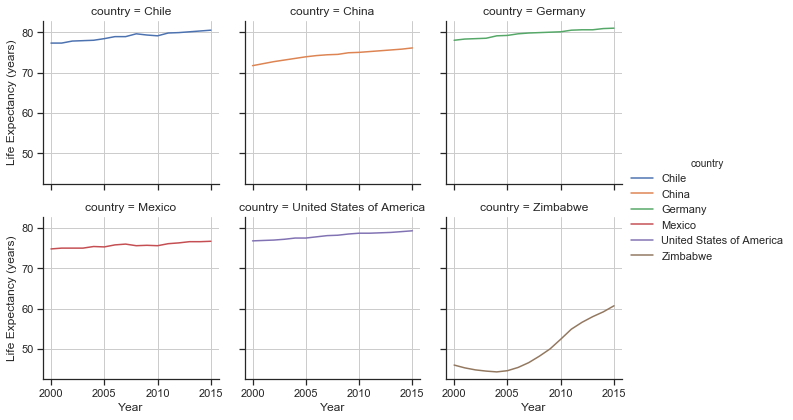

In [91]:
g3 = sns.FacetGrid(df, col = "country", col_wrap = 3, hue = 'country', sharey = True)
g3 = (g3.map(plt.plot, "year", "life_expectancy").add_legend().set_axis_labels('Year', 'Life Expectancy (years)'))

For life expectancy, we can see every country has a small increase over time except for Zimbabwe, which has an increase of about 15 years over the time period.

##### Scatter Plot by Country

We can return to the scatter plot for the FacetGrid, but this time we will plot by country.

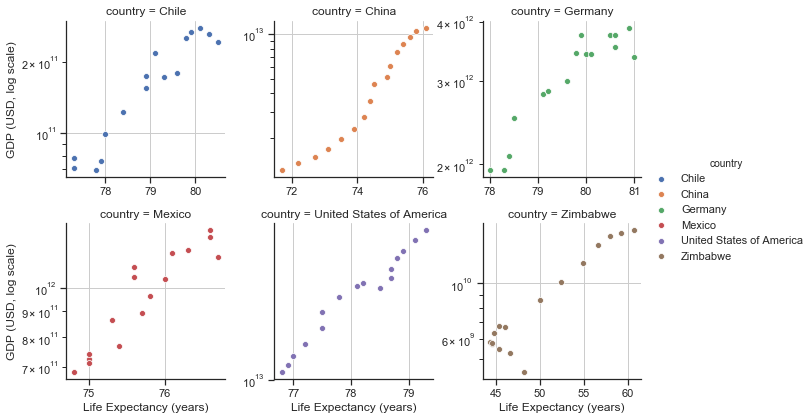

In [92]:
g4 = sns.FacetGrid(df, col = 'country', col_wrap = 3, hue = 'country', sharex = False, sharey = False)
g4 = (g4.map(sns.scatterplot, 'life_expectancy', 'gdp').add_legend().set_axis_labels('Life Expectancy (years)', 'GDP (USD, log scale)').set(yscale = 'log'))

We can see a positive correlation between GDP and life expectancy for each country.

##### Single Scatter Plot

Now, we will plot the data from the previous FacetGrid onto a single scatter plot.

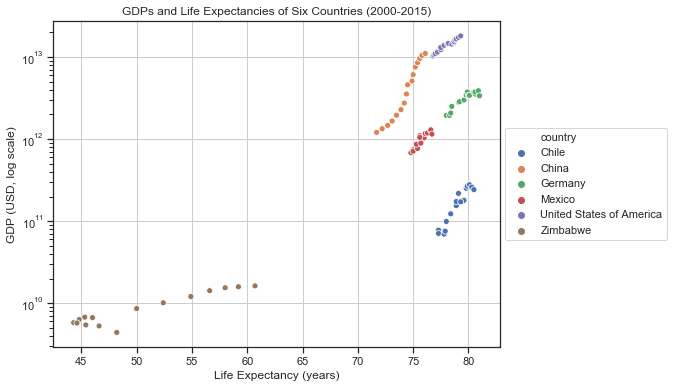

In [93]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df.life_expectancy, y=df.gdp, hue=df.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.title('GDPs and Life Expectancies of Six Countries (2000-2015)')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('GDP (USD, log scale)')

plt.yscale('log')

plt.show()

Plotting on a single graph makes it easier to see where each country stands relative to one another, but it is more difficult to see a strong overall correlation between GDP and life expectancy.

##### Single Line Plot

Next, we will plot our GDP and life expectancy data over time on a single graph.

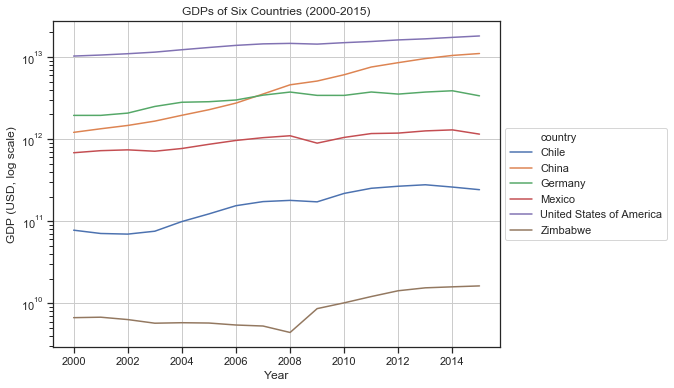

In [94]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=df.year, y=df.gdp, hue=df.country)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.title('GDPs of Six Countries (2000-2015)')
plt.xlabel('Year')
plt.ylabel('GDP (USD, log scale)')

plt.yscale('log')

plt.show()

We can draw similar conclusions as we had from our FacetGrid of line plots for GDP over time, but now we can truly see how significant Chinese GDP growth is over this time period.

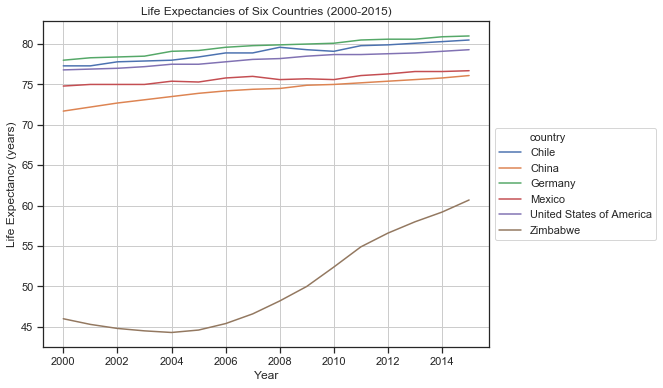

In [95]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=df.year, y=df.life_expectancy, hue=df.country)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.title('Life Expectancies of Six Countries (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')

plt.show()

We can draw similar conclusions as we had from our FacetGrid of line plots for life expectancy over time, but now we can see how much Zimbabwe's life expectancy has improved relative to the other countries over this time period.

## Conclusions

Let's answer some basic questions about our data.

- Has life expectancy increased over time in the six nations?
    - Yes, all countries have shown increases in life expectancy, with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - Yes, GDP has also increased for all countries in our list, especially for China.  However, Germany remained relatively stagnant.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a strong positive correlation between GDP and life expectancy for each country in our list on an individual basis.  When looking at the data collectively, this correlation is not as strong, especially if Zimbabwe is considered an outlier.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid-to-upper 70s for each the countries except for Zimbabwe, which was around 50.
- What is the distribution of that life expectancy?
    - The life expectancy data had a left skew, meaning most of the observations were on the right side.

## Further Research

What happened in China between in the past 10 years that increased the GDP so drastically?

Reasons for rapid Chinese GDP growth:

- A large working population
- Large-scale capital investment
    - Large domestic savings
        - Reforms in 1979, including decentralizing economic production
            - Substantial growth in household savings
            - Substantial growth in corporate savings
    - Large foreign investment
        - Supported by domestic savings
        - China is a net global lender
- Rapid productivity growth
    - Reallocation of resources to more productive uses
        - Especially in sectors formerly heavily controlled by the central government, e.g.:
            - Agriculture
            - Trade
            - Services
        - Workers free to pursue employment in more productive sectors, e.g., manufacturing
    - Rise of non-state enterprises, e.g., private firms; compared to state-owned enterprises:
        - Tend to pursue more productive activities
        - More market-oriented
        - More efficient
        - Greater share of the economy (mainly export sector) exposed to competitive market forces
    - Foreign direct investment brought new technology and efficiency-boosting processes